# HW5-2 -Pymaceuticals

##  In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

##  To do this you are tasked with:

### 1.) Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
### 2.) Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.
### 3.) Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
### 4.) Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

# Three observable trends based on the data below:
1. Tumor volume reduced significantly over time for mice taking the drug Capomulin, with an overall 19.5% reduction in tumor volume over the 45-day course treatment. The other two drugs, Infubinol and Ketapril, showed similar trends in mean tumor volume increase overtime, comparable to the Placebo (control) group. Error bars for the latter two treatments overlapped with the error bars of the placebo group, indicating no significant difference between these treatments, therefore Infubinol and Ketapril appear to be ineffective in controlling tumor size over a 45-day period.

2. The drugs Capomulin and Infubinol were effective in reducing the spread of cancer cells compared to the Placebo (control) group. At the end of the 45-day course treatment, mice taking Capomulin had, on average, half the number of metastatic sites, and mice taking Infubinol had 1/3 less metastatic sites, compared to the placebo group.
The average number of metastatic sites for mice taking Ketapril over time was similar to that of the Placebo group, with error bars overlapping, indicating no significant difference between these two groups.
3. At the end of the 45-day course treatment, mouse survival rate was two-fold higher for the Capomulin treatment (~84%) compared to the other two treatments and the control group. Survival rate was the lowest for the Infubinol group, reaching a low of ~36% by the end of the course treatment.

Overall the drug Capomulin appears to have the best effect in reducing tumor size and the spreading of squamous cell carcinoma (SCC). There is indication that the drug Infubinol aids in the reduction of metastatic sites, but mice taking Infubinol also presented the lowest survival rate, therefore its use is questionable. Mice taking Ketapril had similar if not worse results compared to the Placebo group, therefore its use is not recommended to treat SCC.


In [1]:
#Import Dependencies:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [11]:
#Import and read csv files:
clinical_df=pd.read_csv("raw_data/clinicaltrial_data.csv")
mouse_df=pd.read_csv("raw_data/mouse_drug_data.csv")
#print(clinical_df.head())
#print(len(clinical_df))
#print(mouse_df.head())
#print(len(mouse_df))

In [10]:
#Merge dataframes 
merged_df= pd.merge(mouse_df, clinical_df, on='Mouse ID')
#print(merged_df)
#len(merged_df)

In [12]:
#Check data and clean data if necessary
#print(merged_df.count())
#Check and drop any rows with NA/null data -no rows with missing data identified
merged_df = merged_df.dropna(how='any')
#print(merged_df.count())
#Remove duplicates if any - no duplicates identified
merged_df= merged_df.drop_duplicates()
#print(merged_df.count())
#Check datatype for each column
#merged_df.dtypes
#Check # of different drugs/treatments
#merged_df["Drug"].value_counts()

# Tumor Volume Response to Treatment

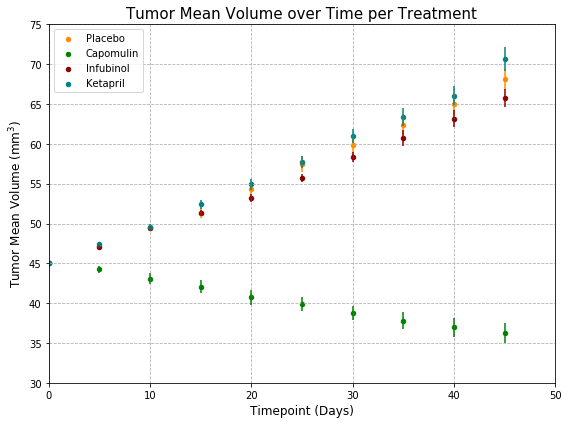

In [5]:
#Group by Drug/Treatment
tumor_treatment= merged_df.drop(["Mouse ID", "Metastatic Sites"], axis =1)
tumor_treatment_grouped= tumor_treatment.groupby(["Drug", "Timepoint"]).mean()
tumor_treatment_grouped= tumor_treatment_grouped.reset_index()
#print(tumor_treatment_grouped)

tumor_SE_grouped= tumor_treatment.groupby(["Drug", "Timepoint"]).sem()
tumor_SE_grouped= tumor_SE_grouped.reset_index()
#print(tumor_SE_grouped)

#Created different data frames for each drug Tumor Volume - MEAN 
Placebo_df=tumor_treatment_grouped.loc[tumor_treatment_grouped["Drug"]=="Placebo"]
Capomulin_df=tumor_treatment_grouped.loc[tumor_treatment_grouped["Drug"]=="Capomulin"]
Infubinol_df=tumor_treatment_grouped.loc[tumor_treatment_grouped["Drug"]=="Infubinol"]
Ketapril_df=tumor_treatment_grouped.loc[tumor_treatment_grouped["Drug"]=="Ketapril"]
#print(Placebo_df, Capomulin_df, Infubinol_df, Ketapril_df)

#Created different data frames for each drug Tumor Volume - SE
Placebo_SE1=tumor_SE_grouped.loc[tumor_SE_grouped["Drug"]=="Placebo"]
Capomulin_SE1=tumor_SE_grouped.loc[tumor_SE_grouped["Drug"]=="Capomulin"]
Infubinol_SE1=tumor_SE_grouped.loc[tumor_SE_grouped["Drug"]=="Infubinol"]
Ketapril_SE1=tumor_SE_grouped.loc[tumor_SE_grouped["Drug"]=="Ketapril"]
#print(Placebo_SE1, Capomulin_SE1, Infubinol_SE1, Ketapril_SE1)

#Create a scatter plot -unable to add a line on the pandas scatterplot. One option is to do a line plot, but then/ 
#I am unable to add error bars on a line plot.
fig, ax = plt.subplots()
Placebo_df.plot.scatter(x='Timepoint', y='Tumor Volume (mm3)', yerr=Placebo_SE1["Tumor Volume (mm3)"], color='DarkOrange', 
                         linewidth =1, label='Placebo', figsize= (8,6), ax=ax)
Capomulin_df.plot.scatter(x='Timepoint', y='Tumor Volume (mm3)', yerr=Capomulin_SE1["Tumor Volume (mm3)"], color='Green',
                        linewidth=1, label='Capomulin', ax=ax )                     
Infubinol_df.plot.scatter(x='Timepoint', y='Tumor Volume (mm3)', yerr=Infubinol_SE1["Tumor Volume (mm3)"], color='DarkRed', 
                        linewidth=1, label='Infubinol', ax=ax)
Ketapril_df.plot.scatter(x='Timepoint', y='Tumor Volume (mm3)', yerr=Ketapril_SE1["Tumor Volume (mm3)"], color='Teal', 
                         linewidth=1, label='Ketapril', ax=ax)

#Set graph parameters 
ax.set_xlabel("Timepoint (Days)", fontsize=12)
ax.set_ylabel("Tumor Mean Volume (mm$^3$)", fontsize=12)
ax.set_title('Tumor Mean Volume over Time per Treatment', fontsize=15)
ax.set_xlim(0,50)
ax.set_ylim(30,75)
ax.grid(True, ls='dashed')
fig.tight_layout()
plt.show()

# Number of Metastatic Sites Response to Treatment

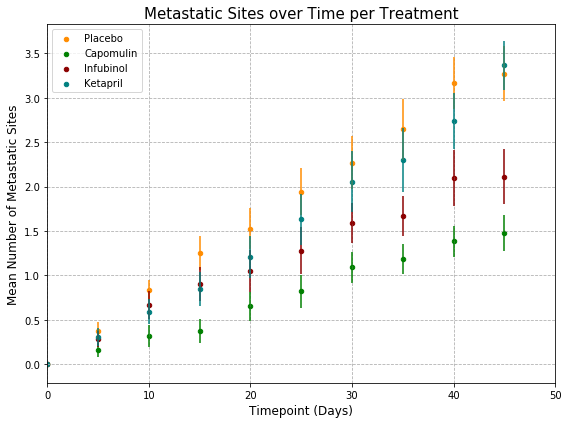

In [6]:
#Group by Drug/Treatment
metastic_sites= merged_df.drop(["Mouse ID", "Tumor Volume (mm3)"], axis =1)
#print(metastic_sites)
metastic_sites_grouped= metastic_sites.groupby(["Drug", "Timepoint"]).mean()
metastic_sites_grouped= metastic_sites_grouped.reset_index()
#print(metastic_sites_grouped)

metastic_SE_grouped= metastic_sites.groupby(["Drug", "Timepoint"]).sem()
metastic_SE_grouped= metastic_SE_grouped.reset_index()
#print(metastic_SE_grouped)

#Created different data frames for each drug Metastic site data - MEAN 
Placebo_df=metastic_sites_grouped.loc[metastic_sites_grouped["Drug"]=="Placebo"]
Capomulin_df=metastic_sites_grouped.loc[metastic_sites_grouped["Drug"]=="Capomulin"]
Infubinol_df=metastic_sites_grouped.loc[metastic_sites_grouped["Drug"]=="Infubinol"]
Ketapril_df=metastic_sites_grouped.loc[metastic_sites_grouped["Drug"]=="Ketapril"]
#print(Placebo_df, Capomulin_df, Infubinol_df, Ketapril_df)

#Created different data frames for each drug Metastic site data - SE
Placebo_SE2=metastic_SE_grouped.loc[metastic_SE_grouped["Drug"]=="Placebo"]
Capomulin_SE2=metastic_SE_grouped.loc[metastic_SE_grouped["Drug"]=="Capomulin"]
Infubinol_SE2=metastic_SE_grouped.loc[metastic_SE_grouped["Drug"]=="Infubinol"]
Ketapril_SE2=metastic_SE_grouped.loc[metastic_SE_grouped["Drug"]=="Ketapril"]
#print(Placebo_SE2, Capomulin_SE2, Infubinol_SE2, Ketapril_SE2)

#Create a scatter plot 
fig2, ax = plt.subplots()
Placebo_df.plot.scatter(x='Timepoint', y='Metastatic Sites', yerr=Placebo_SE2["Metastatic Sites"], color='DarkOrange', 
                        linewidth=1, label='Placebo', figsize=(8,6), ax=ax)
Capomulin_df.plot.scatter(x='Timepoint', y='Metastatic Sites', yerr=Capomulin_SE2["Metastatic Sites"], color='Green',
                        linewidth=1, label='Capomulin', ax=ax)                     
Infubinol_df.plot.scatter(x='Timepoint', y='Metastatic Sites', yerr=Infubinol_SE2["Metastatic Sites"], color='DarkRed', 
                        linewidth=1, label='Infubinol', ax=ax)
Ketapril_df.plot.scatter(x='Timepoint', y='Metastatic Sites', yerr=Ketapril_SE2["Metastatic Sites"], color='Teal',
                        linewidth=1, label='Ketapril', ax=ax)

#Set graph parameters 
ax.set_xlabel('Timepoint (Days)', fontsize=12)
ax.set_ylabel('Mean Number of Metastatic Sites', fontsize=12)
ax.set_title('Metastatic Sites over Time per Treatment', fontsize=15)
ax.set_xlim(0,50)
ax.grid(True, ls ='dashed')
fig2.tight_layout()
plt.show()

# Mouse Survival Rate (%) over Time per Treatment

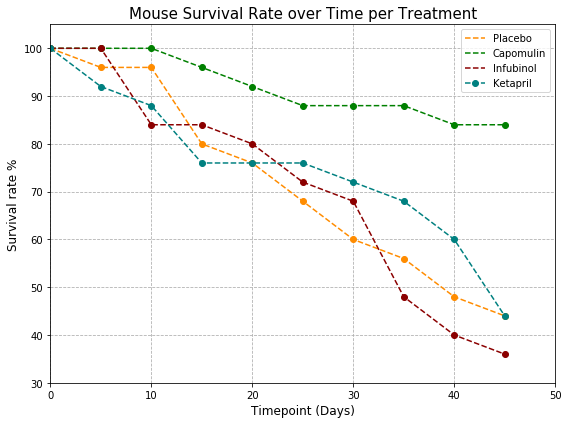

In [7]:
#Group by Drug/Treatment
Survival_rate= merged_df.drop(["Mouse ID", "Tumor Volume (mm3)"], axis =1)
#print(Survival_rate)
Survival_rate_grouped= Survival_rate.groupby(["Drug", "Timepoint"]).count()/25*100
Survival_rate_grouped= Survival_rate_grouped.reset_index()
#print(Survival_rate_grouped)

#Created different data frames for each drug Metastic site data - COUNT
Placebo_df=Survival_rate_grouped.loc[metastic_sites_grouped["Drug"]=="Placebo"]
Capomulin_df=Survival_rate_grouped.loc[Survival_rate_grouped["Drug"]=="Capomulin"]
Infubinol_df=Survival_rate_grouped.loc[Survival_rate_grouped["Drug"]=="Infubinol"]
Ketapril_df=Survival_rate_grouped.loc[Survival_rate_grouped["Drug"]=="Ketapril"]
#print(Placebo_df, Capomulin_df, Infubinol_df, Ketapril_df)

#Create a scatter plot -I chose to use a line plot here instead of a scatterplot to represent markers and lines.
fig3, ax = plt.subplots()
Placebo_df.plot.line(x='Timepoint', y='Metastatic Sites', style= "-o", color='DarkOrange', 
                    linestyle='dashed', label='Placebo', figsize=(8,6),ax=ax)
Capomulin_df.plot.line(x='Timepoint', y='Metastatic Sites', style= "-o", color='Green', 
                    linestyle='dashed', label='Capomulin', ax=ax)                     
Infubinol_df.plot.line(x='Timepoint', y='Metastatic Sites', style= "-o", color='DarkRed', 
                    linestyle='dashed', label='Infubinol', ax=ax)
Ketapril_df.plot.line(x='Timepoint', y='Metastatic Sites', style= "-o", color='Teal', 
                    linestyle='dashed', label='Ketapril', ax=ax)

#Set graph parameters -UNABLE TO ADD LINE with linestyle and linewidth argument
ax.set_xlabel('Timepoint (Days)', fontsize=12)
ax.set_ylabel('Survival rate %', fontsize=12)
ax.set_title('Mouse Survival Rate over Time per Treatment', fontsize=15)
ax.set_xlim(0,50)
ax.set_ylim(30,105)
ax.grid(True, ls='dashed')
fig3.tight_layout()
plt.show()

# Total % tumor volume change for each treatment over a 45-day course

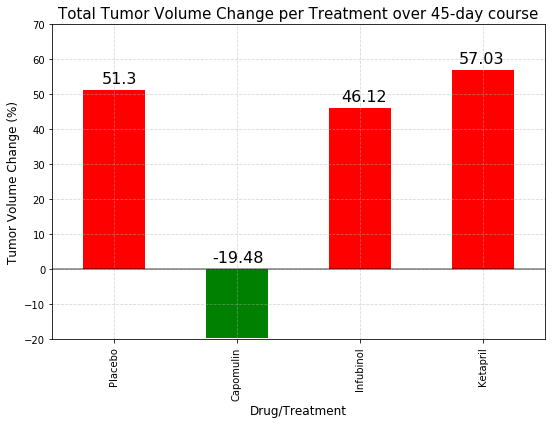

In [17]:
#Group by Drug/Treatment
#print(tumor_treatment_grouped)
initial_volume=tumor_treatment_grouped.loc[tumor_treatment_grouped['Timepoint'] ==0, ['Drug', 'Tumor Volume (mm3)']]
final_volume=tumor_treatment_grouped.loc[tumor_treatment_grouped['Timepoint'] ==45, ['Drug', 'Tumor Volume (mm3)']]

#Calculate change in tumor size over time
initial=initial_volume.set_index('Drug')
final=final_volume.set_index('Drug') 
change=((final-initial)/initial)*100
#print(change)

#Select columns to plot
changes_toplot=change.loc[['Placebo', 'Capomulin', 'Infubinol', 'Ketapril']]
#print(changes_toplot)

#Create lists to refer back to for bar text addition
color_list = ['r', 'g', 'r', 'r']
percentages= round(changes_toplot["Tumor Volume (mm3)"], 2).tolist()
#print(percentages)

#Create a bar chart
changes_toplot.plot(kind="bar", figsize=(8, 6), legend=False, color=color_list, label= percentages)

#Set chart parameters
plt.title("Total Tumor Volume Change per Treatment over 45-day course", fontsize =15)
plt.xlabel("Drug/Treatment", fontsize=12)
plt.ylabel("Tumor Volume Change (%)", fontsize =12)
plt.ylim (-20, 70)
plt.tight_layout()
#plt.text(0, 0, r'{0:.2f},{1:.2f}, {2:.2f}, {3: .2f}'.format(*percentages),fontsize=18)
#need to create a loop to place text on bar more easily
plt.text(-0.095, percentages[0]+2, percentages[0], fontsize=16)
plt.text(0.8, 0+2, percentages[1], fontsize=16)
plt.text(1.85, percentages[2]+2, percentages[2], fontsize=16)
plt.text(2.8, percentages[3]+2, percentages[3], fontsize=16)
plt.axhline(0, color='k', alpha=0.5)
plt.grid(True, alpha=0.5, ls='dashed')    
plt.show()